Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error , mean_squared_error ,  r2_score

Data Collection

In [ ]:
store_data = pd.read_csv("/content/train (1).csv")
store_data.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [ ]:
store_data.shape

(913000, 4)

Gathering Information about Data

In [ ]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


Dropping unneccessary column

In [ ]:
store_data = store_data.drop(['store' , 'item'] , axis = 1)

In [ ]:
store_data.head(10)

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
5,2013-01-06,12
6,2013-01-07,10
7,2013-01-08,9
8,2013-01-09,12
9,2013-01-10,9


In [ ]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


Converting date from object Datatype to date Datatype

In [ ]:
store_data['date'] = pd.to_datetime(store_data['date'])

In [ ]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


Converting date to month period

In [ ]:
store_data['date'] = store_data['date'].dt.to_period('M')

In [ ]:
store_data.head(10)

,date,sales
0,2013-01,13
1,2013-01,11
2,2013-01,14
3,2013-01,13
4,2013-01,10
5,2013-01,12
6,2013-01,10
7,2013-01,9
8,2013-01,12
9,2013-01,9


Sum all the sales in a month

In [ ]:
monthly_sales = store_data.groupby('date').sum().reset_index()

Converting date to timestamp

In [ ]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [ ]:
monthly_sales.head(10)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


Visualisation of Data

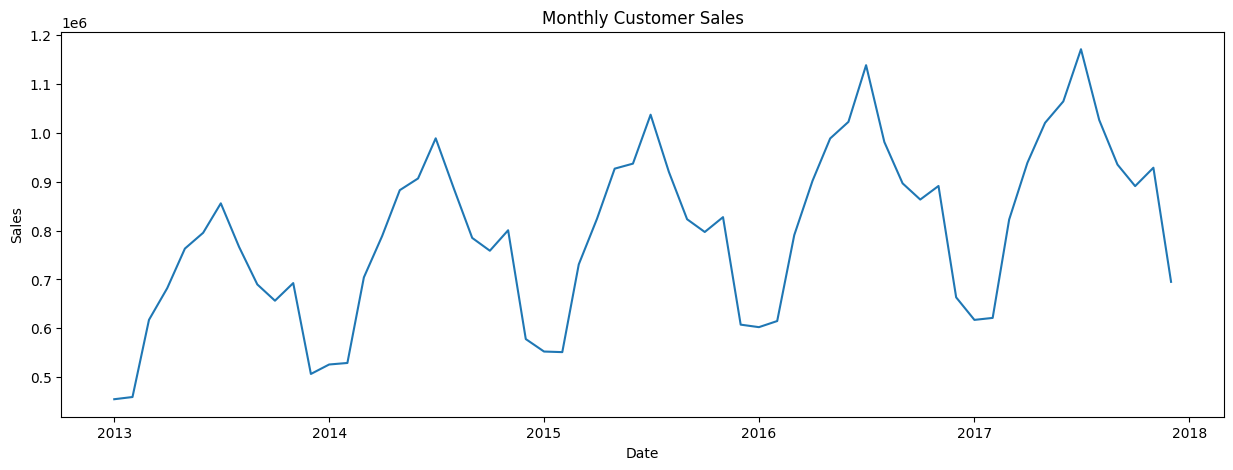

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'] , monthly_sales['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Customer Sales')
plt.show()

Calcuting sales difference

In [ ]:
monthly_sales['sales_diff'] = monthly_sales['sales'].diff() #to check when there is loss or profit
monthly_sales = monthly_sales.dropna() #not available like for jan
monthly_sales.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


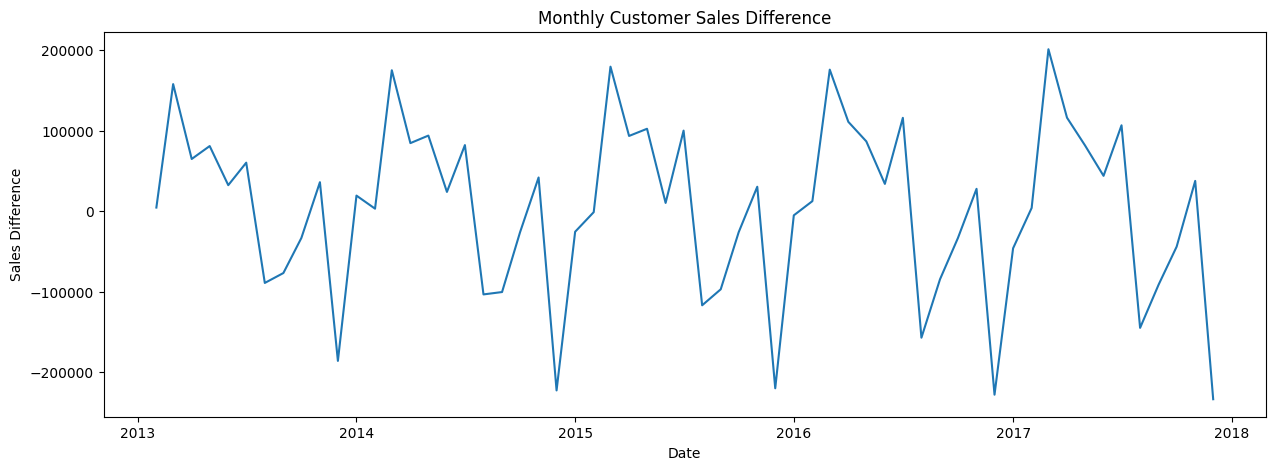

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'] , monthly_sales['sales_diff'])
plt.xlabel('Date')
plt.ylabel('Sales Difference')
plt.title('Monthly Customer Sales Difference')
plt.show()

Dropping off sales and date(as we will predict from the stationary data i.e sales_diff)

In [ ]:
supervised_data = monthly_sales.drop(['date' , 'sales'] , axis = 1)

Preparing supervised Data

In [ ]:
for i in range(1 , 13):
  col_name = 'month_' + str(i)
  supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop = True)

In [ ]:
supervised_data.head(20)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


Spliting the data into Training and testing data

In [ ]:
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]
print("Training data shape : " , train_data.shape)
print("Testing data shape : " , test_data.shape)
#train_data

Training data shape :  (35, 13)
Testing data shape :  (12, 13)


In [ ]:
scaler = MinMaxScaler(feature_range = (-1, 1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
x_train , y_train = train_data[:,1:] , train_data[:,0:1]
x_test , y_test = test_data[:,1:] , test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()

In [ ]:
print(y_train)

[ 0.13408606  0.97816867  0.53383488  0.5797052   0.23630084  0.52183992
 -0.38860993 -0.37417673 -0.01000562  0.32428846 -0.97398883 -0.00654204
  0.11286307  1.          0.57751226  0.62126813  0.16917318  0.61013661
 -0.45501152 -0.35748189 -0.00921086  0.26783117 -0.96092928  0.09354847
  0.18014281  0.98179905  0.66362582  0.544466    0.28520793  0.68808181
 -0.65259731 -0.29661909 -0.04411646  0.255169   -1.        ]


In [ ]:
print("X train Shape" , x_train.shape)
print("Y train Shape" , y_train.shape)
print("X test Shape" , x_test.shape)
print("Y test Shape" , y_test.shape)

X train Shape (35, 12)
Y train Shape (35,)
X test Shape (12, 12)
Y test Shape (12,)


In [ ]:
sales_dates = monthly_sales['date'][-12:].reset_index(drop = True)
predict_df = pd.DataFrame(sales_dates)

In [ ]:
actual_sales = monthly_sales['sales'][-13:].to_list()
print(actual_sales)

[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


Create the Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(x_train , y_train)
pre = model.predict(x_test)

In [ ]:
print(pre)

[ 0.0427074   0.17284957  1.09083796  0.71220971  0.58376708  0.33753568
  0.79053303 -0.71169155 -0.29772672 -0.01470231  0.24425358 -1.02944627]


In [ ]:
pre = pre.reshape(-1, 1)
pre_test_set = np.concatenate([pre , x_test] , axis = 1)
pre_test_set = scaler.inverse_transform(pre_test_set)
print(pre_test_set)

[[ -15496.21493431 -228037.           27811.          -33194.
   -84663.         -157224.          116054.           33934.
    86780.          111069.          175924.           12518.
    -5133.        ]
 [  11031.37815765  -46105.         -228037.           27811.
   -33194.          -84663.         -157224.          116054.
    33934.           86780.          111069.          175924.
    12518.        ]
 [ 198150.00014217    4063.          -46105.         -228037.
    27811.          -33194.          -84663.         -157224.
   116054.           33934.           86780.          111069.
   175924.        ]
 [ 120972.12302654  201298.            4063.          -46105.
  -228037.           27811.          -33194.          -84663.
  -157224.          116054.           33934.           86780.
   111069.        ]
 [  94790.95463016  116195.          201298.            4063.
   -46105.         -228037.           27811.          -33194.
   -84663.         -157224.          116054.        

In [ ]:
result = []
for i in range(0 , len(pre_test_set)):
  result.append(pre_test_set[i][0] + actual_sales[i])
pre_series = pd.Series(result , name = "Linear Predicton")
predict_df = predict_df.merge(pre_series , left_index = True , right_index = True)

In [ ]:
print(predict_df)

         date  Linear Predicton
0  2017-01-01      6.479148e+05
1  2017-02-01      6.283374e+05
2  2017-03-01      8.195190e+05
3  2017-04-01      9.436391e+05
4  2017-05-01      1.033653e+06
5  2017-06-01      1.065286e+06
6  2017-07-01      1.201561e+06
7  2017-08-01      1.002123e+06
8  2017-09-01      9.415142e+05
9  2017-10-01      9.080646e+05
10 2017-11-01      9.167461e+05
11 2017-12-01      6.947978e+05


In [ ]:
mse = np.sqrt(mean_squared_error(predict_df['Linear Predicton'] , monthly_sales['sales'][-12:]))
mae = mean_absolute_error(predict_df['Linear Predicton'] , monthly_sales['sales'][-12:])
r2 = r2_score(predict_df['Linear Predicton'] , monthly_sales['sales'][-12:])

print("Mean squared error : " , mse)
print("Mean absolute error : " , mae)
print("R2 score : " , r2)

Mean squared error :  16221.272385416869
Mean absolute error :  12433.184266490736
R2 score :  0.9906152516380969


Visualisation of predicted sales against actual sales

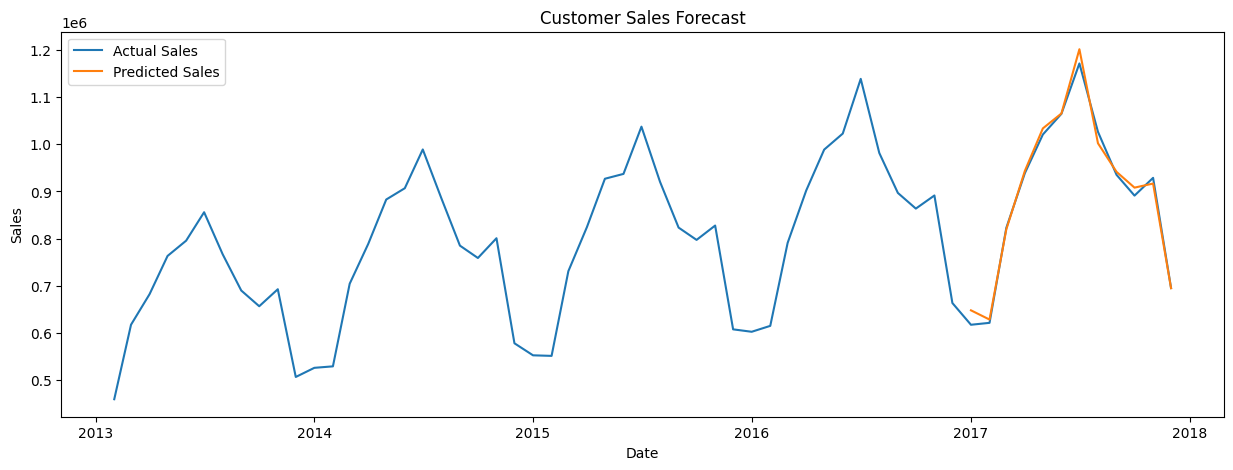

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'] , monthly_sales['sales'])
plt.plot(predict_df['date'] , predict_df['Linear Predicton'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Customer Sales Forecast')
plt.legend(['Actual Sales' , 'Predicted Sales'])
plt.show()